In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file_list=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # I append to a list in case we have multiple files o convert into dfs 
        file_list.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movies-data/imdb-movies-dataset.csv


# Libs

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Checking Data

In [3]:
df = pd.read_csv(file_list[0])
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [4]:
df.columns = df.columns.str.lower()
df.rename(mapper={'duration (min)':'duration_min',
                 'review count':'review_count',
                 'review title': 'review_title'}, 
          axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poster        10000 non-null  object 
 1   title         10000 non-null  object 
 2   year          9850 non-null   float64
 3   certificate   7370 non-null   object 
 4   duration_min  9664 non-null   float64
 5   genre         9993 non-null   object 
 6   rating        9596 non-null   float64
 7   metascore     7555 non-null   float64
 8   director      9995 non-null   object 
 9   cast          9961 non-null   object 
 10  votes         9596 non-null   object 
 11  description   10000 non-null  object 
 12  review_count  9999 non-null   object 
 13  review_title  9483 non-null   object 
 14  review        9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [5]:
df.drop(labels=['poster'],axis=1, inplace=True)

## checking by year

In [6]:
df1 = df
df1.loc[:, 'year'] = df1['year'].fillna(0)
df1.loc[:, 'rating'] = df1['rating'].fillna(df1['rating'].median())
df1.loc[:, 'metascore'] = df1['metascore'].fillna(df1['metascore'].median())
df1.describe()

,year,duration_min,rating,metascore
count,10000.000000,9664.000000,10000.000000,10000.00000
mean,1975.675000,108.809603,6.441090,58.05160
std,244.542327,23.159749,1.030024,15.51077
min,0.000000,45.000000,1.300000,1.00000
25%,1996.750000,95.000000,5.900000,50.00000
50%,2011.000000,105.000000,6.500000,58.00000
75%,2020.250000,118.000000,7.200000,67.00000
max,2025.000000,746.000000,9.700000,100.00000


In [7]:
df1['year']=df1['year'].astype(int)

In [8]:
mean_rating_yearly = df.groupby('year')['rating'].mean().sort_values(ascending=False).head(20)
mean_metascore_yearly = df.groupby('year')['metascore'].mean().sort_values(ascending=False).head(20)
mean_duration_yearly = df.groupby('year')['duration_min'].mean().sort_values(ascending=False).head(20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

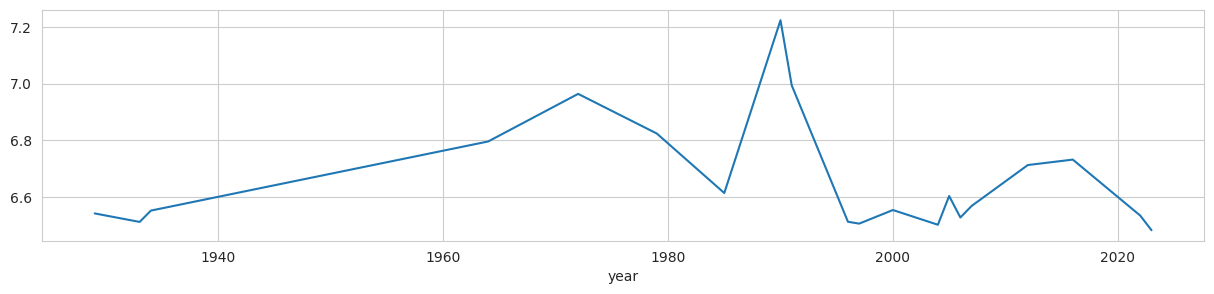

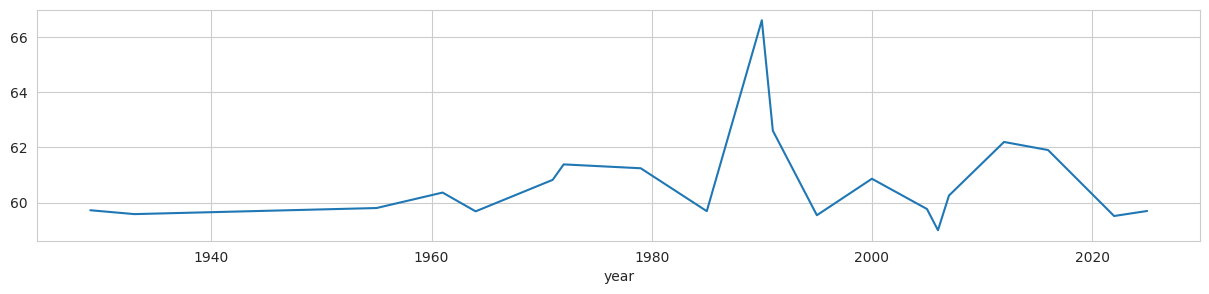

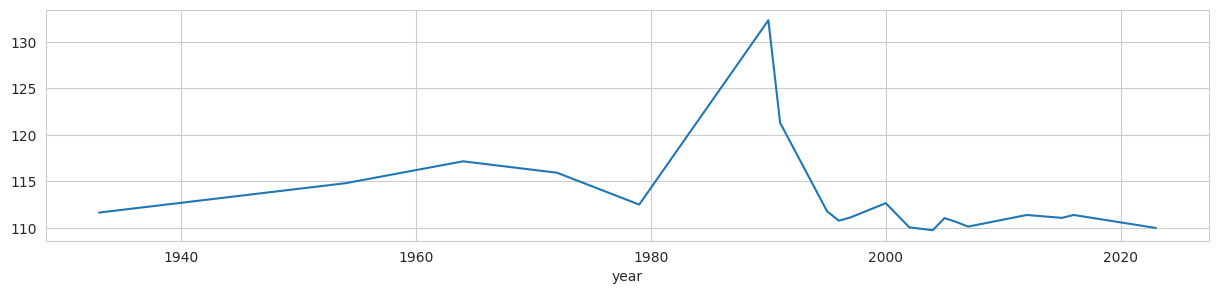

In [9]:
plt.figure(figsize=(15,3))
sns.set_style('whitegrid')
sns.lineplot(mean_rating_yearly, x=mean_rating_yearly.index,
             y=mean_rating_yearly.values)

plt.figure(figsize=(15,3))
sns.lineplot(mean_metascore_yearly, x=mean_metascore_yearly.index,
             y=mean_metascore_yearly.values)

plt.figure(figsize=(15,3))
sns.lineplot(mean_duration_yearly, x=mean_duration_yearly.index,
             y=mean_duration_yearly.values)

plt.show()

In [10]:
df_mean=pd.concat([mean_rating_yearly,mean_metascore_yearly,mean_duration_yearly],
         axis=1, ignore_index=True).reset_index()
df_mean.head()

,year,0,1,2
0,1990,7.224,66.60,132.320000
1,1991,6.994,62.60,121.282609
2,1972,6.964,61.38,115.916667
3,1979,6.824,61.24,112.489796
4,1964,6.796,59.68,117.142857


In [11]:
df_mean.columns = ['year','mean_rating_yearly','mean_metascore_yearly','mean_duration_yearly']
df_mean.head()

,year,mean_rating_yearly,mean_metascore_yearly,mean_duration_yearly
0,1990,7.224,66.60,132.320000
1,1991,6.994,62.60,121.282609
2,1972,6.964,61.38,115.916667
3,1979,6.824,61.24,112.489796
4,1964,6.796,59.68,117.142857


In [12]:
corr = df_mean.corr()

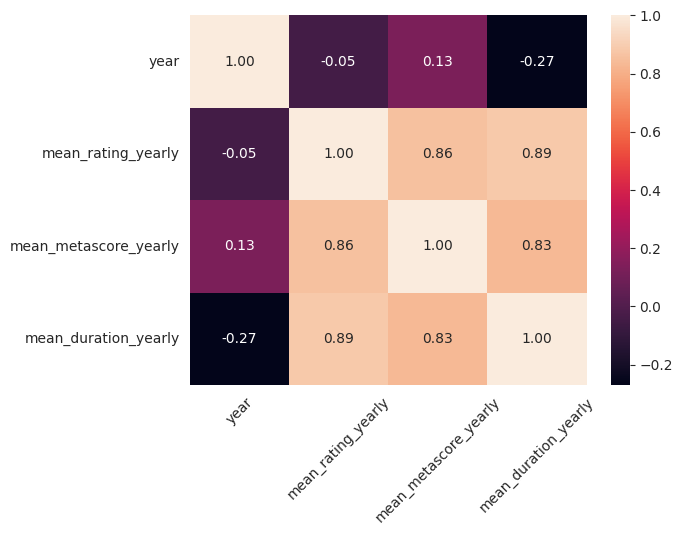

In [13]:
sns.heatmap(corr, annot=True,fmt='.2f' )
plt.xticks(rotation=45)
plt.show()

# Checking certificate

In [14]:
df1.loc[:, 'certificate'] = df1['certificate'].str.lower()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10000 non-null  object 
 1   year          10000 non-null  int64  
 2   certificate   7370 non-null   object 
 3   duration_min  9664 non-null   float64
 4   genre         9993 non-null   object 
 5   rating        10000 non-null  float64
 6   metascore     10000 non-null  float64
 7   director      9995 non-null   object 
 8   cast          9961 non-null   object 
 9   votes         9596 non-null   object 
 10  description   10000 non-null  object 
 11  review_count  9999 non-null   object 
 12  review_title  9483 non-null   object 
 13  review        9484 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [16]:
top_grouped_certificate = df1.groupby('certificate').size().sort_values(ascending=False).head(15)
top_certificate_mean_rating = df1.groupby('certificate')['rating'].mean().sort_values(ascending=False).head(15)
top_certificate_mean_duration = df1.groupby('certificate')['duration_min'].mean().sort_values(ascending=False).head(15)

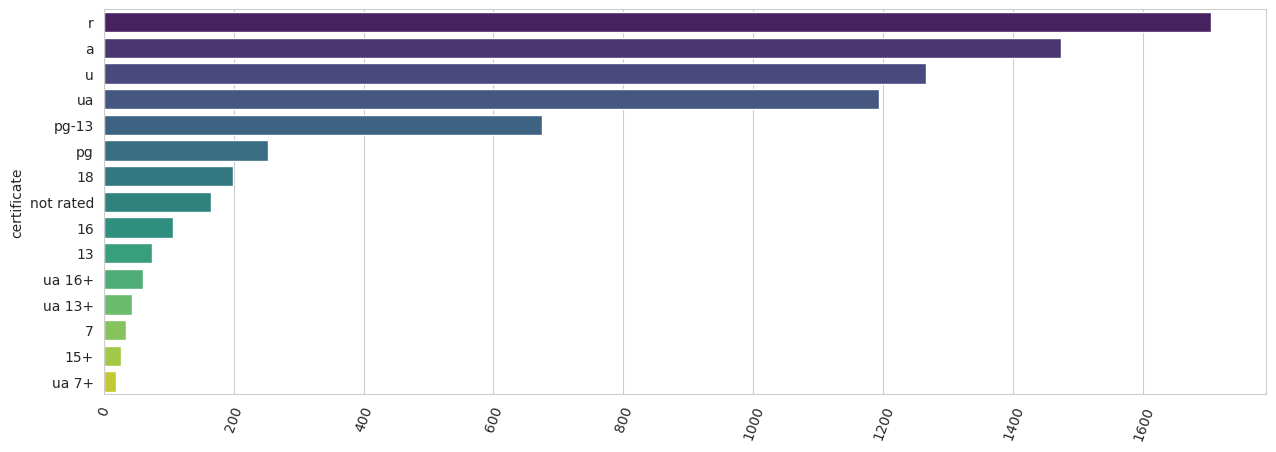

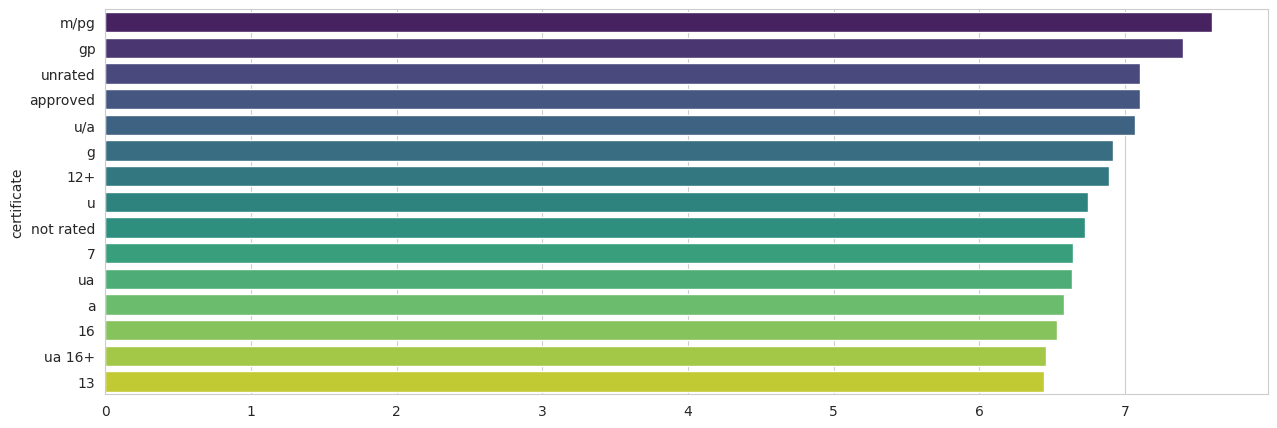

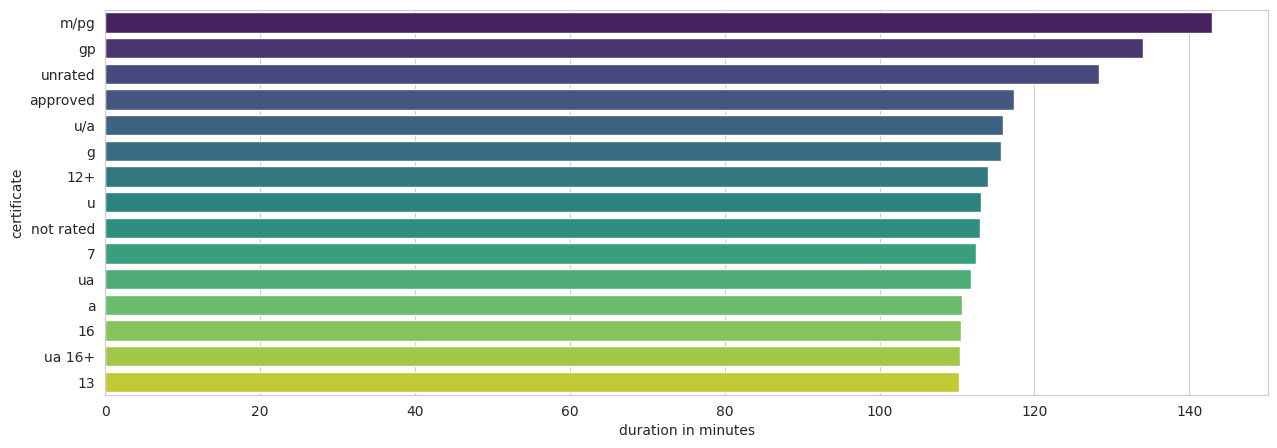

In [17]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
sns.barplot(x=top_grouped_certificate.values,y=top_grouped_certificate.index,palette='viridis')

plt.figure(figsize=(15,5))
sns.barplot(x=top_certificate_mean_rating.values, y=top_certificate_mean_rating.index,palette='viridis')

plt.figure(figsize=(15,5))
sns.barplot(x=top_certificate_mean_duration.values, y=top_certificate_mean_rating.index,palette='viridis')
plt.xlabel('duration in minutes')
plt.show()

# Checking directors

In [18]:
df1.head()

,title,year,certificate,duration_min,genre,rating,metascore,director,cast,votes,description,review_count,review_title,review
0,The Idea of You,2023,r,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023,pg-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023,pg-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023,pg-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023,r,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [19]:
df1.loc[:, 'director'] = df1['director'].str.lower()

In [20]:
df1.director.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: director
Non-Null Count  Dtype 
--------------  ----- 
9995 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [21]:
top_metascore_directors = df1.groupby('director')['metascore'].mean().sort_values(ascending=False).head(15)

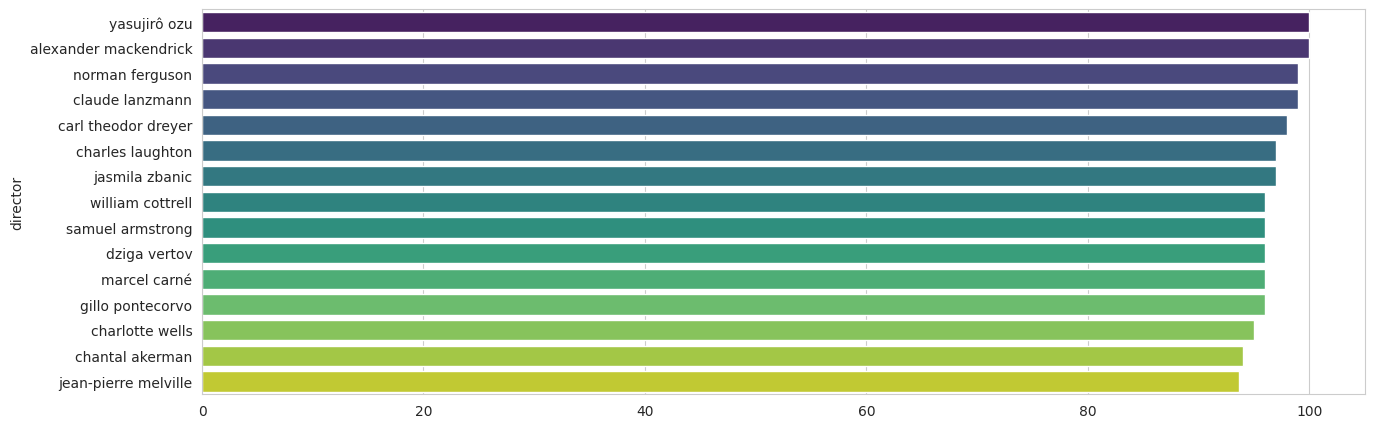

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_metascore_directors.values, y=top_metascore_directors.index,palette='viridis')
plt.show()

In [23]:
df[df['director']== 'yasujirô ozu']

,title,year,certificate,duration_min,genre,rating,metascore,director,cast,votes,description,review_count,review_title,review
6119,Tôkyô monogatari,2018,u,136.0,Drama,8.1,100.0,yasujirô ozu,"Chishû Ryû, Chieko Higashiyama, Sô Yamamura, S...","68,797",An old couple visit their children and grandch...,169,Ozu's Quietly Brilliant Masterpiece Deserves Y...,I think this movie is amazing for reasons I wa...


In [24]:
df1.groupby('director').size().sort_values(ascending=False).head(20)

director
clint eastwood          35
steven spielberg        33
ridley scott            28
steven soderbergh       26
martin scorsese         26
ron howard              26
alfred hitchcock        24
woody allen             22
robert zemeckis         21
francis ford coppola    20
renny harlin            20
tim burton              20
david cronenberg        19
guy ritchie             18
roman polanski          18
brian de palma          18
barry levinson          17
john carpenter          17
robert rodriguez        17
tony scott              16
dtype: int64

In [25]:
df1

,title,year,certificate,duration_min,genre,rating,metascore,director,cast,votes,description,review_count,review_title,review
0,The Idea of You,2023,r,115.0,"Comedy, Drama, Romance",6.4,67.0,michael showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,2023,pg-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,wes ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,2023,pg-13,97.0,"Biography, Comedy, History",5.5,42.0,jerry seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,2023,pg-13,126.0,"Action, Comedy, Drama",7.3,73.0,david leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,2023,r,131.0,"Drama, Romance, Sport",7.7,82.0,luca guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Greatest Show on Earth,2020,u,152.0,"Drama, Family, Romance",6.5,76.0,cecil b. demille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020,NaN,76.0,"Animation, Action, Adventure",7.5,58.0,toshiyuki kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,Is-slottet,2020,NaN,78.0,"Mystery, Drama",6.5,58.0,per blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,Loving Pablo,2020,a,123.0,"Biography, Crime, Drama",6.4,42.0,fernando león de aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...
